In [46]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
import re 
from nltk.stem import PorterStemmer

In [47]:
df = pd.read_csv('IMDB Dataset.csv')

In [48]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment'>

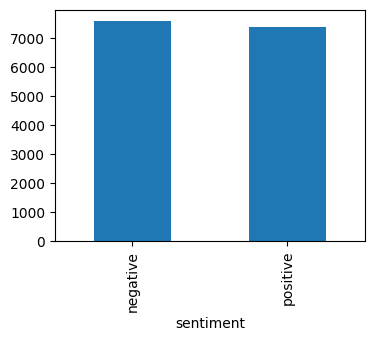

In [49]:
plt.figure(figsize=(4,3))
df['sentiment'].value_counts().plot(kind='bar')

In [50]:
stop_words = set(stopwords.words('english'))

In [51]:
pos_sen = list(df[df['sentiment']== 'positive']['review'])

In [52]:
neg_sen = list(df[df['sentiment'] == 'negative']['review'])

In [53]:
def create_cloud(string, title=None):
    cloud = WordCloud(
        height=400,
        width=900,
        background_color='green',
        min_font_size=10, 
            stopwords = stop_words
    ).generate(string)

    plt.figure(figsize=(10,5))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':15})
    plt.show()

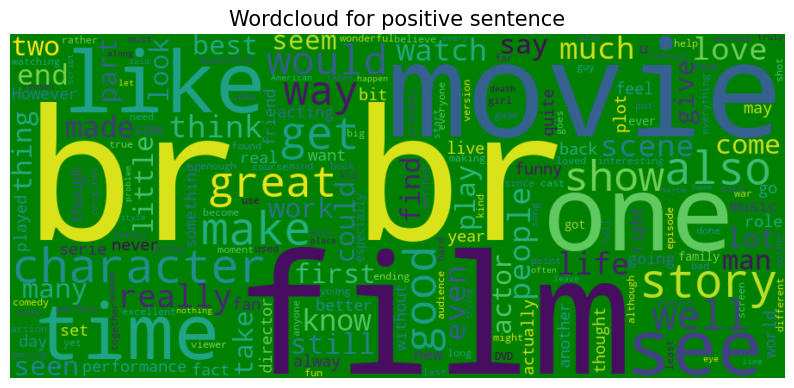

In [54]:
create_cloud(" ".join(pos_sen), 'Wordcloud for positive sentence')

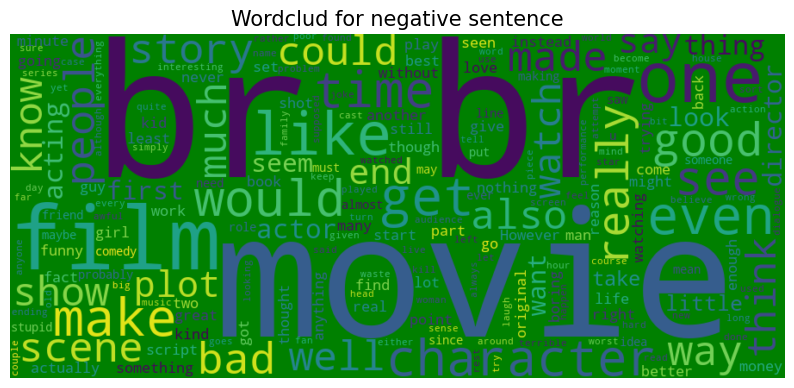

In [55]:
create_cloud(" ".join(neg_sen), 'Wordclud for negative sentence')

In [56]:
class prep:
    def text_preprocessing(review):
        sen = re.sub(r'<br\s*/?>', '', review)
        sen = re.sub(r"won't", "will not", sen)
        sen = re.sub(r"can't", "can not", sen)
        sen = re.sub(r'\d+', '', sen)
        sen = re.sub(r'<[^>]+>', '', sen)
        sen = re.sub(r'[^\w\s]', '', sen)

        lower_sen = sen.lower()
        rem_stop = " ".join(word for word in lower_sen.split() if word not in stop_words)
        porter_stem = PorterStemmer()
        stemmed = " ".join(porter_stem.stem(word) for word in rem_stop.split())
        return stemmed

In [57]:
df['clean_text'] = df['review'].apply(prep.text_preprocessing)

In [58]:
df.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [59]:
pos_re = list(df[df['sentiment'] == 'positive']['clean_text'])
neg_re = list(df[df['sentiment'] == 'negative']['clean_text'])

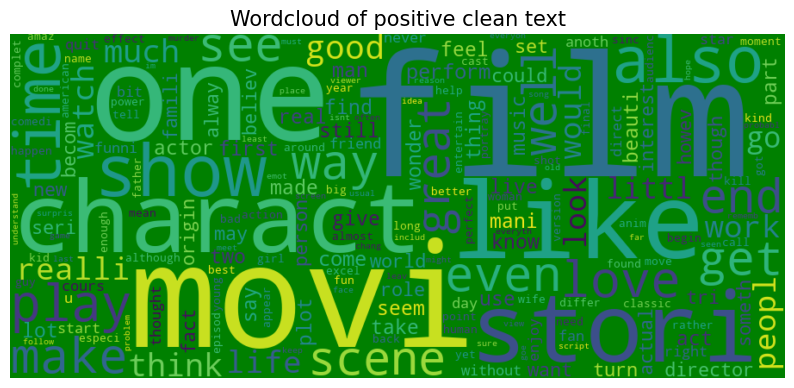

In [60]:
create_cloud(" ".join(pos_re), 'Wordcloud of positive clean text')

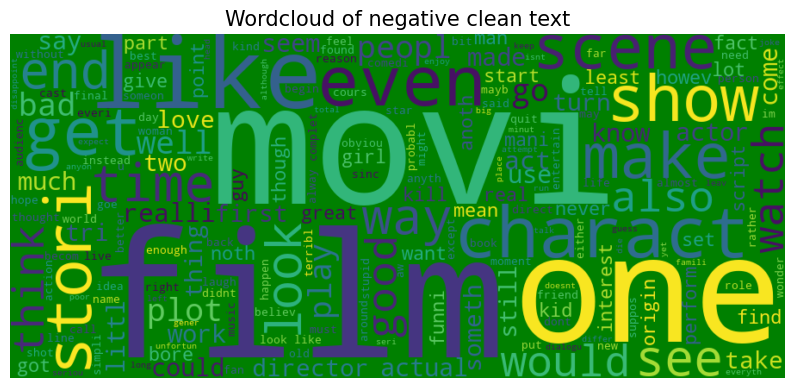

In [61]:
create_cloud(" ".join(neg_re), 'Wordcloud of negative clean text')

In [62]:
tf_idf = TfidfVectorizer(max_features=10000)

In [63]:
encode = tf_idf.fit_transform(df['clean_text'])

In [64]:
encode.shape

(14999, 10000)

In [65]:
data = encode.toarray()

In [66]:
xtrain,xtest, ytrain, ytest = train_test_split(data, df['sentiment'], test_size=0.2)

In [ ]:
gbn = Gua